In [1]:
import pandas as pd
import numpy as np
import csv
import copy

In [2]:
#Import all the data

#Households data
houses = pd.read_csv('desktop/Caltrans/California_Household_Travel_Survey_2010_2012/caltrans_full_survey/survey_person.csv', encoding = "ISO-8859-1")

#Trips data
obd_trips = pd.read_csv('desktop/Caltrans/California_Household_Travel_Survey_2010_2012/caltrans_full_survey/obd_gpstrips.csv', encoding = "ISO-8859-1")
vgps_trips = pd.read_csv('desktop/Caltrans/California_Household_Travel_Survey_2010_2012/caltrans_full_survey/v_gpstrips.csv', encoding = "ISO-8859-1")
wgps_trips = pd.read_csv('desktop/Caltrans/California_Household_Travel_Survey_2010_2012/caltrans_full_survey/w_gpstrips.csv', encoding = "ISO-8859-1")


/Users/david/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (9,46,50,51,102,105,120) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
h = houses[['sampno', 'empl_occupation']]
h

In [6]:
#get rid of all the Nan's
hhs = h.dropna()

In [30]:
hhs

,sampno,empl_occupation
0,7128119,23.0
2,7128138,25.0
4,7128262,98.0
8,7128316,35.0
10,7128401,25.0
12,7128401,43.0
16,7128439,23.0
17,7128452,11.0
21,7128552,17.0
24,7128628,53.0


In [39]:
#found online

#sorts to get sampno with lowest empl_occpation so there will not be duplicates
unique_hh_occupation = hhs.sort_values("empl_occupation").groupby("sampno", as_index=False).first()
unique_hh_occupation

,sampno,empl_occupation
0,1032036,15.0
1,1032053,29.0
2,1032425,11.0
3,1033586,98.0
4,1033944,27.0
5,1035198,11.0
6,1035274,98.0
7,1035364,13.0
8,1037295,15.0
9,1038232,41.0


In [37]:
#make a list of households

hhs_sampleno = hhs["sampno"]

list_houses = set([]) #so no duplicates
for s in hhs_sampleno:
    list_houses.add(s)
    
list_houses

{2621444,
 7208971,
 2621453,
 2621464,
 7208989,
 7208991,
 1966111,
 3014694,
 1179689,
 2490410,
 1835052,
 2490412,
 3014702,
 2228277,
 7077943,
 1835066,
 7077954,
 1835084,
 1441871,
 2490449,
 2490453,
 1704022,
 3014746,
 1835101,
 2097246,
 3014752,
 1835107,
 1441893,
 2490472,
 2621544,
 7209067,
 2490476,
 1704062,
 1835135,
 1048704,
 1441922,
 7209091,
 3014786,
 2490503,
 2883720,
 3014793,
 1966220,
 2490508,
 1048730,
 1835163,
 2490525,
 1704095,
 1048736,
 7209132,
 1835193,
 1835198,
 1835204,
 1704136,
 2621640,
 2490570,
 2883796,
 2490585,
 3014875,
 1835229,
 1835230,
 1310943,
 2883810,
 2228452,
 1179881,
 1966315,
 2883820,
 1442032,
 1835255,
 1835262,
 1966335,
 2752777,
 7209228,
 1835282,
 3014931,
 1048852,
 7209242,
 1704221,
 2621727,
 1704224,
 1704229,
 1835314,
 1442103,
 2752831,
 2752832,
 1442113,
 2883914,
 2883922,
 3014996,
 2228569,
 2490714,
 2752864,
 2752866,
 3015029,
 1835395,
 2621831,
 2621834,
 1835410,
 1966489,
 2490779,
 3015069,


In [8]:
#Get all the trips into one Series
vgps = vgps_trips['sampno']
obd = obd_trips['sampno']
wgps = wgps_trips['sampno']

#Check the size of the Series
print(vgps.size + obd.size+ wgps.size)

204633


In [9]:
#just check that its in series format
vgps.head()

0    1776019
1    2759536
2    2055542
3    2556033
4    2759536
Name: sampno, dtype: int64

In [10]:
series1 = vgps.append(obd)
series1.size


83034

In [11]:
series2 = series1.append(wgps)
series2.size

#series2 matches the size of the Series so Good to go

204633

In [12]:
#check size of series is the accurate
series = series2.copy(deep = True)
series.size

204633

In [13]:
from collections import defaultdict

In [40]:
#make a dictionary with sampno mapped to residence type
mapping = {}

for row in unique_hh_occupation.values:
    s_num = int(row[0])
    occup = row[1]
    mapping[s_num] = occup

print(mapping)

{1032036: 15.0, 1032053: 29.0, 1032425: 11.0, 1033586: 98.0, 1033944: 27.0, 1035198: 11.0, 1035274: 98.0, 1035364: 13.0, 1037295: 15.0, 1038232: 41.0, 1038404: 11.0, 1038428: 11.0, 1039341: 25.0, 1039423: 11.0, 1041304: 25.0, 1041305: 41.0, 1041422: 39.0, 1041494: 27.0, 1041766: 15.0, 1041770: 45.0, 1041893: 11.0, 1042011: 33.0, 1042679: 39.0, 1043521: 11.0, 1043613: 25.0, 1043722: 51.0, 1044265: 11.0, 1044414: 33.0, 1044596: 13.0, 1044767: 35.0, 1044940: 13.0, 1045490: 37.0, 1045607: 97.0, 1045672: 11.0, 1046885: 41.0, 1047092: 17.0, 1048704: 37.0, 1048730: 53.0, 1048736: 41.0, 1048852: 43.0, 1049769: 98.0, 1049908: 99.0, 1050385: 11.0, 1050668: 11.0, 1050821: 41.0, 1051203: 13.0, 1051388: 97.0, 1051649: 27.0, 1051795: 31.0, 1052241: 11.0, 1052523: 37.0, 1052905: 25.0, 1053095: 37.0, 1053110: 41.0, 1053915: 43.0, 1055449: 35.0, 1056368: 53.0, 1056785: 27.0, 1058056: 11.0, 1058112: 25.0, 1058315: 13.0, 1058468: 31.0, 1058669: 17.0, 1058857: 11.0, 1058917: 31.0, 1059023: 43.0, 1059184: 

In [45]:
counts = defaultdict(int)

#now iterate through data
for trip in series:
    
    #print(trip)
    #get the residence type of each
 
    if trip not in list_houses:
        pass
    else:
        add_on = mapping[trip]
       # print(add_on)
        counts[add_on] += 1
    
   # add_on = mapping[trip]
    #counts[add_on] += 1
    
counts

defaultdict(int,
            {13.0: 22284,
             25.0: 19064,
             11.0: 44575,
             43.0: 8624,
             35.0: 3924,
             15.0: 16095,
             49.0: 2225,
             21.0: 4142,
             51.0: 1367,
             27.0: 4828,
             23.0: 4148,
             29.0: 8641,
             97.0: 2235,
             19.0: 5221,
             33.0: 2909,
             17.0: 12624,
             53.0: 2378,
             31.0: 3730,
             47.0: 2384,
             39.0: 2982,
             41.0: 8692,
             98.0: 872,
             37.0: 2922,
             99.0: 1412,
             55.0: 368,
             45.0: 649})

In [46]:
aaa = set([])
for num in counts.keys():
    aaa.add(num)
    
aaa

{11.0,
 13.0,
 15.0,
 17.0,
 19.0,
 21.0,
 23.0,
 25.0,
 27.0,
 29.0,
 31.0,
 33.0,
 35.0,
 37.0,
 39.0,
 41.0,
 43.0,
 45.0,
 47.0,
 49.0,
 51.0,
 53.0,
 55.0,
 97.0,
 98.0,
 99.0}

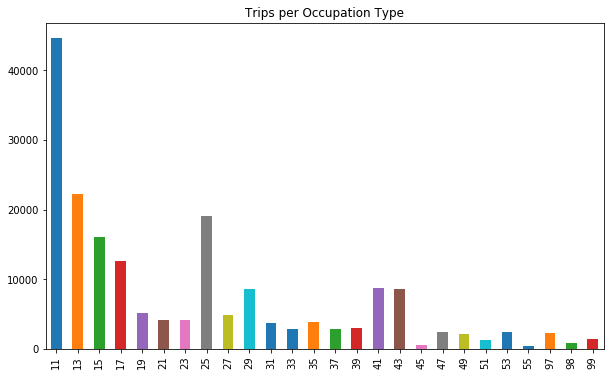

In [49]:
#build the Series
trip_counts_Series = pd.Series([44575, 22284, 16095, 12624, 5221, 4142, 4148, 19064, 4828, 8641, 3730, 2909, 3924, 2922, 2982, 8692, 8624, 649, 2384, 2225, 1367, 2378, 368, 2235, 872, 1412], index=['11','13','15','17','19','21','23','25','27','29','31','33','35','37','39','41','43','45','47','49','51','53','55','97','98','99'])

#build the plot from "trip_counts_Series"
trip_count_plot = trip_counts_Series.plot(kind='bar', title="Trips per Occupation Type", figsize=(10,6))